## Importing Libraries

In [23]:
import pandas as pd
import numpy as np
import visualization
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.mixture import GaussianMixture

In [24]:
df = pd.read_csv("insurance.csv")

In [25]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


##  Converting Categorical Data Using Encoding

In [26]:
df['sex'].replace(['female', 'male'], [0, 1], inplace=True)
df['smoker'].replace(['no', 'yes'], [0, 1], inplace=True)
df['region'].replace(['northeast', 'northwest', 'southeast', 'southwest'], [0, 1, 2, 3], inplace=True)

In [27]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


## Preparing Model

In [28]:
from cycler import cycler

# get colormap
cmap=plt.cm.gist_rainbow
# build cycler with 5 equally spaced colors from that colormap
c = cycler('color', cmap(np.linspace(0,1,5)) )
# supply cycler to the rcParam
plt.rcParams["axes.prop_cycle"] = c

## Sex vs Charges

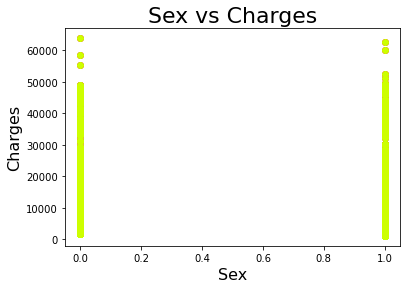

<Figure size 144x144 with 0 Axes>

In [39]:
sex_charges = df[['sex', 'charges']]

gmm = GaussianMixture(n_components = 2)
gmm.fit(sex_charges)

#predictions from gmm
labels = gmm.predict(sex_charges)
sex_frame = pd.DataFrame(sex_charges)
sex_frame['cluster'] = labels
sex_frame.columns = ['sex', 'charges', 'cluster']

for k in range(0,2):
    age_charges = sex_frame[sex_frame["cluster"]==k]
    plt.scatter(sex_charges["sex"],sex_charges["charges"])
plt.title('Sex vs Charges', fontdict={'fontsize':22})
plt.xlabel('Sex', fontsize=16)
plt.ylabel('Charges', fontsize=16)
plt.figure(figsize=(2, 2))
plt.show()

## Smoker vs Charges

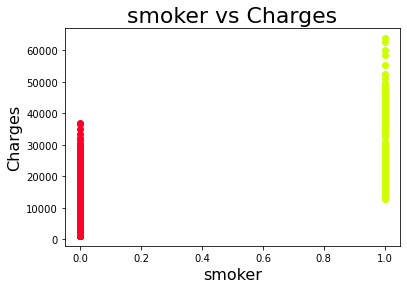

<Figure size 144x144 with 0 Axes>

In [34]:
smoker_charges = df[['smoker', 'charges']]

gmm = GaussianMixture(n_components = 2)
gmm.fit(smoker_charges)

#predictions from gmm
labels = gmm.predict(smoker_charges)
smoker_frame = pd.DataFrame(smoker_charges)
smoker_frame['cluster'] = labels
smoker_frame.columns = ['smoker', 'charges', 'cluster']

for k in range(0,2):
    smoker_charges = smoker_frame[smoker_frame["cluster"]==k]
    plt.scatter(smoker_charges["smoker"],smoker_charges["charges"])
plt.title('smoker vs Charges', fontdict={'fontsize':22})
plt.xlabel('smoker', fontsize=16)
plt.ylabel('Charges', fontsize=16)
plt.figure(figsize=(2, 2))
plt.show()

## Region vs Charges

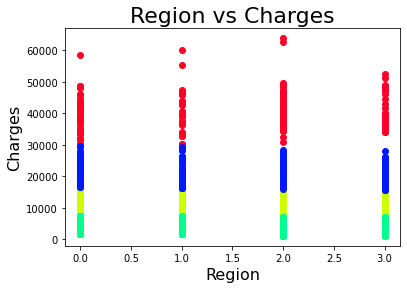

<Figure size 144x144 with 0 Axes>

In [148]:
region_charges = df[['region', 'charges']]

gmm = GaussianMixture(n_components = 4)
gmm.fit(region_charges)

#predictions from gmm
labels = gmm.predict(region_charges)
region_frame = pd.DataFrame(region_charges)
region_frame['cluster'] = labels
region_frame.columns = ['region', 'charges', 'cluster']

for k in range(0,4):
    region_charges = region_frame[region_frame["cluster"]==k]
    plt.scatter(region_charges["region"],region_charges["charges"])
plt.title('Region vs Charges', fontdict={'fontsize':22})
plt.xlabel('Region', fontsize=16)
plt.ylabel('Charges', fontsize=16)
plt.figure(figsize=(2, 2))
plt.show()

In [180]:
rv_cluster_a = region_frame[region_frame['cluster'] == 0]
rv_cluster_b = region_frame[region_frame['cluster'] == 3]
rv_cluster_c = region_frame[region_frame['cluster'] == 1]
rv_cluster_d = region_frame[region_frame['cluster'] == 2]

In [181]:
print(rv_cluster_a.describe(), end = '\n\n')
print(rv_cluster_b.describe(), end = '\n\n')
print(rv_cluster_c.describe(), end = '\n\n')
print(rv_cluster_d.describe(), end = '\n\n')

           region       charges  cluster
count  162.000000    162.000000    162.0
mean     1.617284  40761.308558      0.0
std      1.064012   6165.955587      0.0
min      0.000000  30063.580550      0.0
25%      1.000000  36203.125612      0.0
50%      2.000000  39854.111650      0.0
75%      2.000000  44481.999400      0.0
max      3.000000  63770.428010      0.0

           region       charges  cluster
count  183.000000    183.000000    183.0
mean     1.409836  21752.752456      3.0
std      1.064570   3676.609480      0.0
min      0.000000  15820.699000      3.0
25%      0.000000  18822.424565      3.0
50%      1.000000  21223.675800      3.0
75%      2.000000  24569.373460      3.0
max      3.000000  29523.165600      3.0

           region       charges  cluster
count  462.000000    462.000000    462.0
mean     1.504329  10893.170137      1.0
std      1.157351   2176.258378      0.0
min      0.000000   7147.105000      1.0
25%      0.000000   8980.678513      1.0
50%      1.000

In [182]:
rv_clusters = [rv_cluster_a, rv_cluster_b, rv_cluster_c, rv_cluster_d]

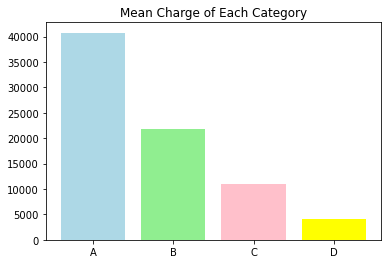

In [183]:
plt.bar(['A','B','C','D'], [x.mean()['charges'] for x in rv_clusters], color = ['lightblue', 'lightgreen', 'pink', 'yellow'])
plt.title("Mean Charge of Each Category");

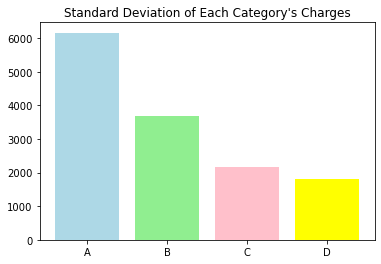

In [184]:
plt.bar(['A','B','C','D'], [x.std()['charges'] for x in rv_clusters], color = ['lightblue', 'lightgreen', 'pink', 'yellow'])
plt.title("Standard Deviation of Each Category's Charges");

### Groups A and B have a quarter as many people as groups C and D. Keeping this in mind before we perform any analysis. It's clear the disparity in costs from the first bar plot of mean costs. The standard deviation seems to go in order too. However that's because of the higher values of the data, not because of any variation

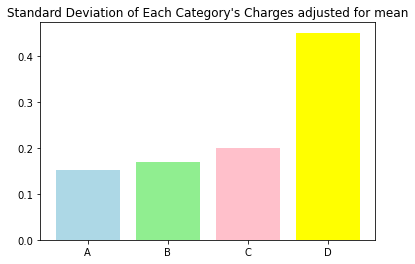

In [185]:
plt.bar(['A','B','C','D'], [x.std()['charges']/x.mean()['charges'] for x in rv_clusters], color = ['lightblue', 'lightgreen', 'pink', 'yellow'])
plt.title("Standard Deviation of Each Category's Charges adjusted for mean");

### In reality it's the opposite.

### Moving on from the statistics, let's try and add a third dimension to our clusters

In [186]:
regionA_frame = df.loc[rv_cluster_a.index]
regionB_frame = df.loc[rv_cluster_b.index]
regionC_frame = df.loc[rv_cluster_c.index]
regionD_frame = df.loc[rv_cluster_d.index]
region_frames = [regionA_frame, regionB_frame, regionC_frame, regionD_frame]

In [187]:
for w in region_frames:
    print("___Group___")
    for x in list(w.columns):
        print(x + ": " + str(w['charges'].corr(w[x])))

___Group___
age: 0.4608787541768041
sex: -0.06923142102492211
bmi: 0.4473862261998677
children: 0.03195615545325037
smoker: 0.3379367977969537
region: 0.06553424012954841
charges: 1.0
___Group___
age: 0.6247956652795883
sex: -0.06842258809796326
bmi: 0.10864872191665333
children: -0.08140417709092194
smoker: -0.17732505527663098
region: -0.12417042234687167
charges: 1.0
___Group___
age: 0.34844197429738427
sex: -0.0658552824858574
bmi: -0.023767984470426582
children: -0.1515710600415206
smoker: 0.305799834322545
region: -0.17236917444349517
charges: 1.0
___Group___
age: 0.9122599862262281
sex: -0.08357135280724105
bmi: 0.018937208748950624
children: 0.5084730801286563
smoker: nan
region: -0.11208349096106594
charges: 1.0


### Group A: No significant relationships
### Group B: Age might be interesting
### Group C: Nothing of interest
### Group D: Age is a defining feature of cost. Also no smokers in region D?

In [188]:
set(regionD_frame['smoker'])

{0}

In [189]:
regionD_frame.age.describe()

count    531.000000
mean      28.483992
std        7.756022
min       18.000000
25%       21.000000
50%       28.000000
75%       35.000000
max       45.000000
Name: age, dtype: float64

In [174]:
df.age.max()

64

In [175]:
regionD_frame

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
3,33,1,22.705,0,0,1,21984.47061
9,60,0,25.840,0,0,1,28923.13692
11,62,0,26.290,0,1,2,27808.72510
45,55,1,37.300,0,0,3,20630.28351
...,...,...,...,...,...,...,...
1314,30,0,23.655,3,1,1,18765.87545
1318,35,1,39.710,4,0,0,19496.71917
1321,62,1,26.695,0,1,0,28101.33305
1328,23,0,24.225,2,0,0,22395.74424


### Group D seems to be the most interesting region cluster for now. No smokers yet they have the largest sample with a wide variety of ages. Also interesting the age cap is 45, when the overall highest is 64. 

## Age vs Charges Clustering

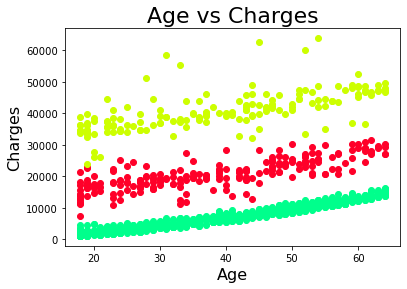

<Figure size 144x144 with 0 Axes>

In [11]:
age_charges = df[['age', 'charges']]

gmm = GaussianMixture(n_components = 3)
gmm.fit(age_charges)

#predictions from gmm
labels = gmm.predict(age_charges)
frame = pd.DataFrame(age_charges)
frame['cluster'] = labels
frame.columns = ['age', 'charges', 'cluster']

for k in range(0,3):
    age_charges = frame[frame["cluster"]==k]
    plt.scatter(age_charges["age"],age_charges["charges"])
plt.title('Age vs Charges', fontdict={'fontsize':22})
plt.xlabel('Age', fontsize=16)
plt.ylabel('Charges', fontsize=16)
plt.figure(figsize=(2, 2))
plt.show()

In [13]:
cluster_a = frame[frame['cluster'] == 0]
cluster_b = frame[frame['cluster'] == 1]
cluster_c = frame[frame['cluster'] == 2]

In [22]:
print(cluster_a.describe(), end = '\n\n')
print(cluster_b.describe(), end = '\n\n')
print(cluster_c.describe())

              age       charges  cluster
count  214.000000    214.000000    214.0
mean    38.406542  20845.700767      0.0
std     13.859054   4777.502801      0.0
min     18.000000   7323.734819      0.0
25%     27.000000  17635.465682      0.0
50%     38.500000  20358.734050      0.0
75%     50.000000  24455.764483      0.0
max     64.000000  31620.001060      0.0

              age       charges  cluster
count  159.000000    159.000000    159.0
mean    39.056604  40841.123357      1.0
std     14.368234   6295.432074      0.0
min     18.000000  24059.680190      1.0
25%     25.000000  36352.687150      1.0
50%     39.000000  39983.425950      1.0
75%     51.000000  44543.427035      1.0
max     64.000000  63770.428010      1.0

              age       charges  cluster
count  965.000000    965.000000    965.0
mean    39.409326   7047.778666      2.0
std     14.047021   3870.496438      0.0
min     18.000000   1121.873900      2.0
25%     27.000000   3597.596000      2.0
50%     40.000

### All three clusters suprisingly have almost the same mean value of 39. So despite the variation in spread and variance, they're all centered around the same point.

## Age vs Bmi vs Charges Clustering

In [136]:
age_bmi = df[['age', 'bmi', 'charges']]

In [137]:
gmm = GaussianMixture(n_components=6)
gmm.fit(age_bmi)

#predictions from gmm
labels = gmm.predict(age_bmi)
frame = pd.DataFrame(age_bmi)
frame['cluster'] = labels
frame.columns = ['age', 'bmi', 'charges', 'cluster']

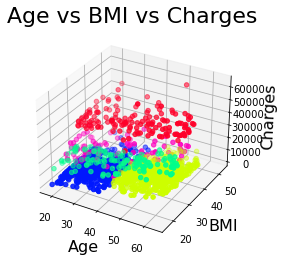

In [140]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for k in range(0,6):
    age_bmi = frame[frame["cluster"]==k]
    ax.scatter(age_bmi["age"],age_bmi["bmi"], age_bmi['charges'])
    
ax.set_title('Age vs BMI vs Charges', fontdict={'fontsize':22})
ax.set_xlabel('Age', fontsize=16)
ax.set_ylabel('BMI', fontsize=16)
ax.set_zlabel('Charges', fontsize = 16)
plt.show()

In [141]:
type(ax)

matplotlib.axes._subplots.Axes3DSubplot

In [32]:
df.loc[:][4:7]

,age,sex,bmi,children,smoker,region,charges,cluster
4,32,1,28.88,0,0,1,3866.8552,0
5,31,0,25.74,0,0,2,3756.6216,0
6,46,0,33.44,1,0,2,8240.5896,0


In [34]:
df[['age', 'bmi', 'charges']]

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
...,...,...,...
1333,50,30.970,10600.54830
1334,18,31.920,2205.98080
1335,18,36.850,1629.83350
1336,21,25.800,2007.94500
